In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glove6b/glove.6B.200d.txt
/kaggle/input/glove6b/glove.6B.50d.txt
/kaggle/input/glove6b/glove.6B.300d.txt
/kaggle/input/glove6b/glove.6B.100d.txt
/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [2]:
import spacy
import string
import re
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
import matplotlib
plt.style.use("ggplot")
matplotlib.rcParams["figure.figsize"] = (10,5)
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [3]:
data_path = '/kaggle/input/amazon-fine-food-reviews/Reviews.csv'
df2 = pd.read_csv(data_path)


In [5]:
df2.shape

(568454, 10)

In [6]:
df2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df2.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [8]:
df2.keys()

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

#### Id:
This is the unique identifier for each review.
#### ProductId:
This is the  ID of the product being reviewed.
#### UserId:
This is ID of the user who wrote the review.
#### ProfileName: 
This is the user's profile name.
#### HelpfulnessNumerator: 
This is the number of users who found the review helpful.
#### HelpfulnessDenominator:
This is the total number of users who rated the review for helpfulness.
#### Score:
This is the rating given by the user, which we are using for sentiment analysis.
#### Time: 
This is thetime when the review was posted.
#### Summary:
This is a summary of the review.
#### Text:
This is the full text of the review.

In [9]:
df2.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [10]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,568454.0,2.842275e+05,1.640987e+05,1.0,1.421142e+05,2.842275e+05,4.263408e+05,5.684540e+05
HelpfulnessNumerator,568454.0,1.743817e+00,7.636513e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,8.660000e+02
HelpfulnessDenominator,568454.0,2.228810e+00,8.289740e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,9.230000e+02
Score,568454.0,4.183199e+00,1.310436e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Time,568454.0,1.296257e+09,4.804331e+07,939340800.0,1.271290e+09,1.311120e+09,1.332720e+09,1.351210e+09


In [11]:

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [12]:
# printing some few rows
first_3rows = [print(text + '\n\n') for text in df2['Text'].values[:3]]


I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".


This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.




## Comprehensive Analysis of Review Dynamics and Trends

### Distribution of Scores

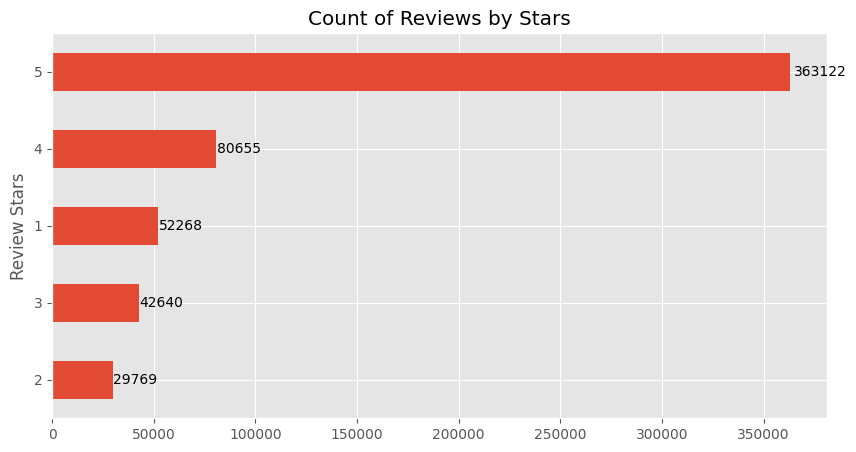

In [13]:
ax = df2['Score'].value_counts().sort_values()\
    .plot(kind='barh',  # Horizontal bar chart
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_ylabel('Review Stars')

# Annotate each bar with the count of reviews
for p in ax.patches:  # loop through bars
    ax.annotate(f'{int(p.get_width())}',  # Get the width of the bar (the count)
                (p.get_width() * 1.005, p.get_y() + p.get_height() / 2),  # Position to place text (a little right of the bar)
                va='center')  # Center alignment of the text

plt.show()


### Distribution of Number of Reviews over Time

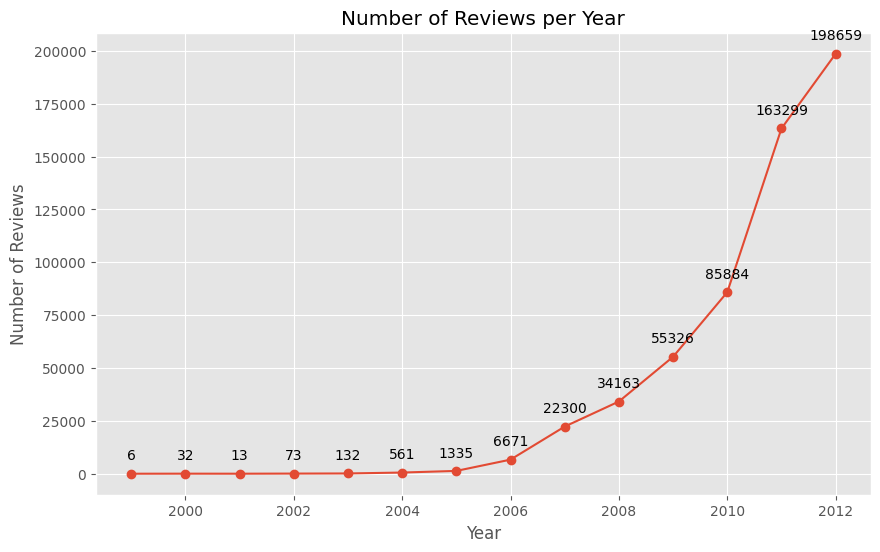

In [14]:
# Converting the 'Time' column from UNIX timestamp to datetime
df2['Time'] = pd.to_datetime(df2['Time'], unit='s')

# Extracting the year
df2['Year'] = df2['Time'].dt.year

# Grouping by 'Year' and counting the number of reviews each year
yearly_reviews = df2.groupby('Year')['Id'].count()

plt.figure(figsize=(10, 6))
plt.plot(yearly_reviews.index, yearly_reviews.values, marker='o', linestyle='-')
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')

# Annotate each point with the count of reviews
for i, txt in enumerate(yearly_reviews.values):
    plt.annotate(txt, (yearly_reviews.index[i], yearly_reviews.values[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


## In-Depth Analysis of Consumer Review Patterns and Impact on Products"


## What are the top 10 most reviewed products?

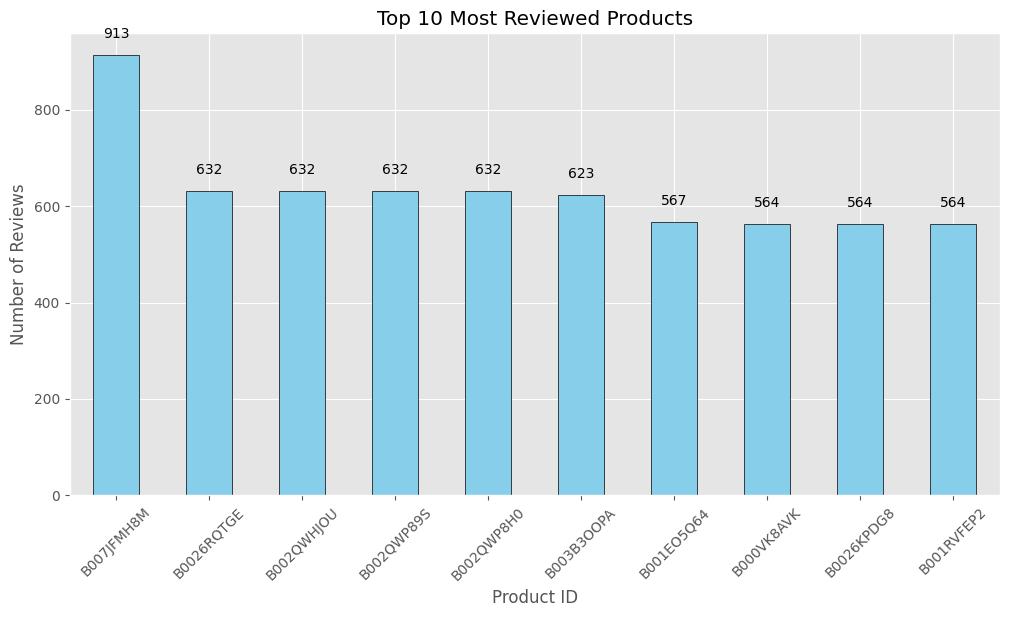

In [15]:
# Grouping by ProductId and counting the reviews
Top_products = df2.groupby('ProductId').size()\
                 .sort_values(ascending=False)\
                 .head(10)

plt.figure(figsize=(12, 6))
ax = Top_products.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Most Reviewed Products')
plt.ylabel('Number of Reviews')
plt.xlabel('Product ID')
plt.xticks(rotation=45)

# Annotate each bar with the count of reviews
for p in ax.patches:  # ax.patches is a list of rectangles (bars) for the plot
    ax.annotate(f'{int(p.get_height())}',  # Get the height of the bar (number of reviews)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the text in the center of the bar
                ha='center', va='bottom', color='black', textcoords='offset points', xytext=(0,10))

plt.show()


##  What are the top 10 most  active reviewers?

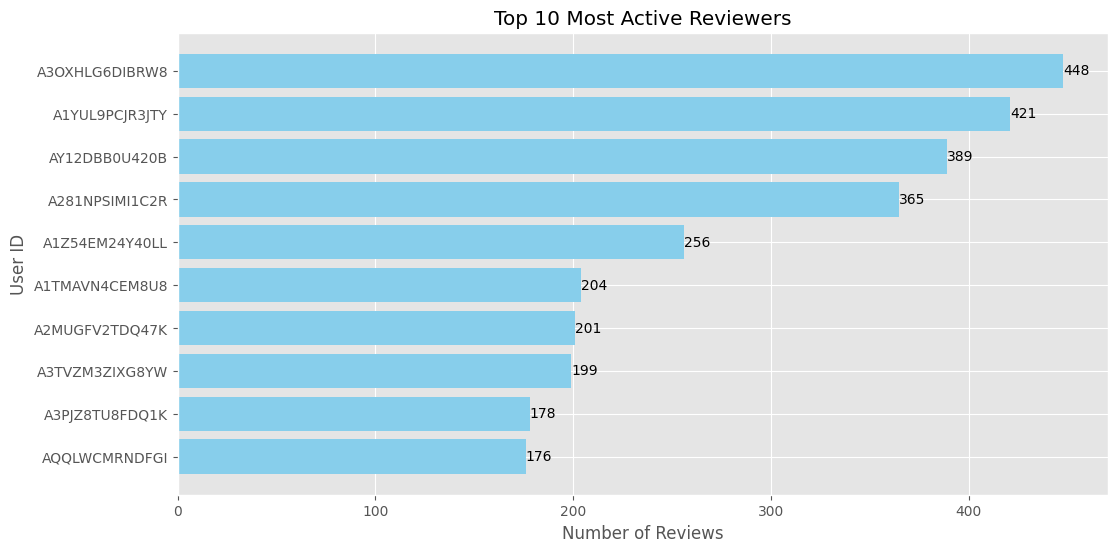

In [16]:
# Grouping by UserId and counting the reviews
Top_reviewers = df2.groupby('UserId').size()\
                 .sort_values(ascending=False)\
                 .head(10)

plt.figure(figsize=(12, 6))
bars = plt.barh(Top_reviewers.index, Top_reviewers.values, color="skyblue")
plt.title('Top 10 Most Active Reviewers')
plt.xlabel('Number of Reviews')
plt.ylabel('User ID')
plt.gca().invert_yaxis()

# Annotate each bar with the count of reviews
for bar in bars:
    plt.text(bar.get_width(),  # x-coordinate position of text
             bar.get_y() + bar.get_height()/2,  # y-coordinate position of text
             f'{int(bar.get_width())}',  # text to display (number of reviews)
             va='center',  # vertical alignment
             ha='left')  # horizontal alignment

plt.show()


#### What is the distribution of the helpfulness ratio across all reviews?

#### How does the trends or patterns in the helpfulness ratios when compared to other factors like the Score or ProductId?

In [17]:
# Filtering out rows where HelpfulnessDenominator is 0 to avoid division by zero
helpful_reviews_df = df2[df2['HelpfulnessDenominator'] > 0]

# Calculating the helpfulness ratio
df2['HelpfulnessRatio'] = df2['HelpfulnessNumerator'] / df2['HelpfulnessDenominator']

# Sorting by the helpfulness ratio and getting the top 5 most helpful reviews
top_helpful_reviews = df2.sort_values(by='HelpfulnessRatio', ascending=False).head(5)

# Displaying the top 5 most helpful reviews (only selected columns for brevity)
top_helpful_reviews[['ProductId', 'Score', 'Summary', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'HelpfulnessRatio']]


,ProductId,Score,Summary,HelpfulnessNumerator,HelpfulnessDenominator,HelpfulnessRatio
64421,B000MIDROQ,5,Bought This for My Son at College,3,1,3.0
44736,B001EQ55RW,4,Pure cocoa taste with crunchy almonds inside,3,2,1.5
418155,B000KOUKK6,5,super food,1,1,1.0
418156,B0005ZHGMU,1,"Sugar, Sugar, and More Sugar.",3,3,1.0
418159,B0041BV07Q,2,Overpriced,2,2,1.0


## What's the average review score for each product?

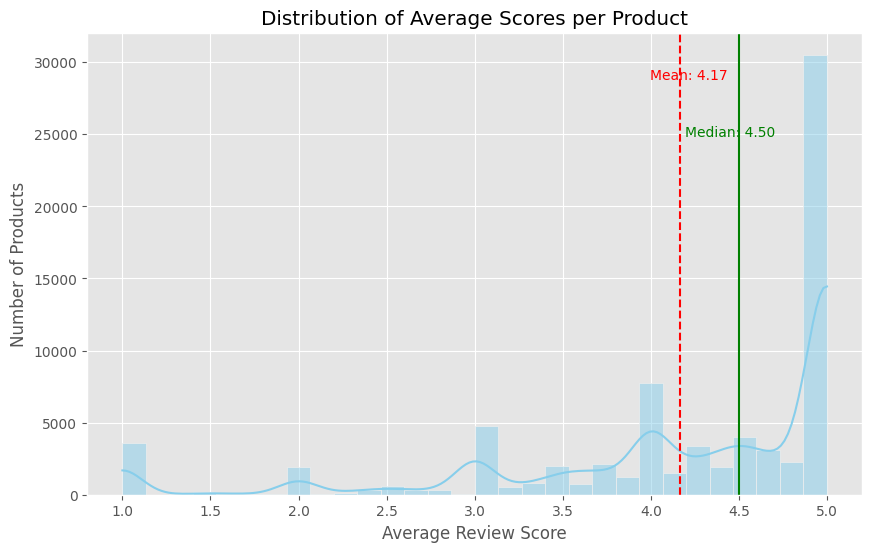

In [18]:
# Calculating the average score per product
avg_scores = df2.groupby('ProductId')['Score'].mean()

# Plotting the distribution of average scores per product
plt.figure(figsize=(10, 6))
ax = sns.histplot(avg_scores, bins=30, kde=True, color="skyblue")
plt.title("Distribution of Average Scores per Product")
plt.xlabel("Average Review Score")
plt.ylabel("Number of Products")

# Calculate the mean and median of avg_scores
mean_val = avg_scores.mean()
median_val = avg_scores.median()

# Annotate the mean
plt.axvline(mean_val, color='r', linestyle='--')
plt.text(mean_val+0.05, plt.ylim()[1]*0.9, f'Mean: {mean_val:.2f}',
         color = 'red', ha='center')

# Annotate the median
plt.axvline(median_val, color='g', linestyle='-')
plt.text(median_val-0.05, plt.ylim()[1]*0.8, f'Median: {median_val:.2f}',
         color = 'green', ha='center', verticalalignment='top')

plt.show()


# Basic Spacy

In [19]:
nlp = spacy.load("en_core_web_lg")

In [20]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [21]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7c85787884c0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7c85785ba2c0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7c85789d1850>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7c85789b36c0>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7c8566c72580>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7c85789d10e0>)]

In [22]:
text100 = df2['Text'].values[100]
print(text100)

The mouth says, "How do I love thee, let me count the ways..."<br />If you like apple products a must have item.  The only draw back, shipping cost.  These are very heavy.


### Tokenization in spacy

In [23]:

text100 = df2['Text'].values[100]
doc = nlp(text100)

tokens = [token.text for token in doc]
print(tokens[:20])


['The', 'mouth', 'says', ',', '"', 'How', 'do', 'I', 'love', 'thee', ',', 'let', 'me', 'count', 'the', 'ways', '...', '"<br', '/>If', 'you']


### Tokenization and part-of-speech tag.

In [24]:
text100 = df2['Text'].values[100]
doc = nlp(text100)

tagged = [(token.text, token.pos_) for token in doc]
print(tagged[:10])


[('The', 'DET'), ('mouth', 'NOUN'), ('says', 'VERB'), (',', 'PUNCT'), ('"', 'PUNCT'), ('How', 'SCONJ'), ('do', 'AUX'), ('I', 'PRON'), ('love', 'VERB'), ('thee', 'PRON')]


In [25]:
doc = nlp("man ,woman, girl, gun")
for token in doc:
    print(token.text, "Vector:", token.has_vector, "OOV:", token.is_oov)

man Vector: True OOV: False
, Vector: True OOV: False
woman Vector: True OOV: False
, Vector: True OOV: False
girl Vector: True OOV: False
, Vector: True OOV: False
gun Vector: True OOV: False


In [26]:
doc = nlp('text100')

for token in doc:
    print(token.text, "Vector:", token.has_vector, "OOV:", token.is_oov)

text100 Vector: False OOV: True


### Named entities and their labels or   information extraction

In [27]:

# Text to process
text = "Toyota is looking to buy Tesle  UK startup for $125 billion"

# Process the text
doc = nlp(text)

# Extract named entities
for ent in doc.ents:
    print(ent.text," | ", ent.label_, " | ", spacy.explain(ent.label_))
  


Toyota  |  ORG  |  Companies, agencies, institutions, etc.
Tesle  |  ORG  |  Companies, agencies, institutions, etc.
UK  |  GPE  |  Countries, cities, states
$125 billion  |  MONEY  |  Monetary values, including unit


In [28]:
text50 = df2['Text'].values[50]
doc = nlp(text50)

# Limiting the output to the first 10 tokens
for token in doc[:10]:
    print(token.text, token.dep_, token.head.text, list(token.children))


This det oatmeal []
oatmeal nsubj is [This]
is ROOT is [oatmeal, not, good, .]
not neg is []
good acomp is []
. punct is []
Its poss soft []
mushy amod soft []
, punct soft []
soft amod like [Its, mushy, ,]


In [29]:
df2['Text'][50]

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [30]:
doc = nlp("Is it accurate to assert that Trump presented Biden with 10 billion US dollars as a Christmas gift?")
for token in doc:
    print(token,"==>", "index: ", token.i, "is_alpha:", token.is_alpha,
         "is_punct:", token.is_punct,
         "like_num:", token.like_num,
         "is_currency:",token.is_currency,)

Is ==> index:  0 is_alpha: True is_punct: False like_num: False is_currency: False
it ==> index:  1 is_alpha: True is_punct: False like_num: False is_currency: False
accurate ==> index:  2 is_alpha: True is_punct: False like_num: False is_currency: False
to ==> index:  3 is_alpha: True is_punct: False like_num: False is_currency: False
assert ==> index:  4 is_alpha: True is_punct: False like_num: False is_currency: False
that ==> index:  5 is_alpha: True is_punct: False like_num: False is_currency: False
Trump ==> index:  6 is_alpha: True is_punct: False like_num: False is_currency: False
presented ==> index:  7 is_alpha: True is_punct: False like_num: False is_currency: False
Biden ==> index:  8 is_alpha: True is_punct: False like_num: False is_currency: False
with ==> index:  9 is_alpha: True is_punct: False like_num: False is_currency: False
10 ==> index:  10 is_alpha: False is_punct: False like_num: True is_currency: False
billion ==> index:  11 is_alpha: True is_punct: False like_

In [31]:
doc = nlp("This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.")
for token in doc:
    print(token,"==>", "index: ", token.i, "is_alpha:", token.is_alpha,
         "is_punct:", token.is_punct,
         
         "like_num:", token.like_num,
        
          "is_currency:",token.is_currency,)

This ==> index:  0 is_alpha: True is_punct: False like_num: False is_currency: False
oatmeal ==> index:  1 is_alpha: True is_punct: False like_num: False is_currency: False
is ==> index:  2 is_alpha: True is_punct: False like_num: False is_currency: False
not ==> index:  3 is_alpha: True is_punct: False like_num: False is_currency: False
good ==> index:  4 is_alpha: True is_punct: False like_num: False is_currency: False
. ==> index:  5 is_alpha: False is_punct: True like_num: False is_currency: False
Its ==> index:  6 is_alpha: True is_punct: False like_num: False is_currency: False
mushy ==> index:  7 is_alpha: True is_punct: False like_num: False is_currency: False
, ==> index:  8 is_alpha: False is_punct: True like_num: False is_currency: False
soft ==> index:  9 is_alpha: True is_punct: False like_num: False is_currency: False
, ==> index:  10 is_alpha: False is_punct: True like_num: False is_currency: False
I ==> index:  11 is_alpha: True is_punct: False like_num: False is_curren

## NLTK Basics¶

In [32]:
import nltk

# Download the punkt tokenizer models
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
text50 = df2['Text'][50]
print(text50)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [34]:
tokens = nltk.word_tokenize(text50)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [35]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

## Text Normalization: Stemming and Lemmatization¶

## Stemming in NLTK

In [36]:
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet  

# Download necessary NLTK resources
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from tqdm import tqdm
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [37]:
# Applying stemming to each word

words = ['thinking', 'thought', 'thoughtful', 'thinker', 'beautiful', 'beauty', 'quickly', 'faster', 'greatest', 'better', 'walked', 'walking']


stemmed_words = [stemmer.stem(word) for word in words]
# Iterating through the list and stem each word
for word in words:
    print(word, "|", stemmer.stem(word))

thinking | think
thought | thought
thoughtful | thought
thinker | thinker
beautiful | beauti
beauty | beauti
quickly | quickli
faster | faster
greatest | greatest
better | better
walked | walk
walking | walk


## GloVe  Basics

In [38]:
import gensim.downloader as api


In [39]:
# Load a pre-trained model
Glv_model = api.load("glove-twitter-25")  



[==================================================] 100.0% 104.8/104.8MB downloaded


In [40]:
print(list(api.info()['models'].keys()))


['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [41]:
vector =Glv_model["computer"]
vector


array([ 0.64005 , -0.019514,  0.70148 , -0.66123 ,  1.1723  , -0.58859 ,
        0.25917 , -0.81541 ,  1.1708  ,  1.1413  , -0.15405 , -0.11369 ,
       -3.8414  , -0.87233 ,  0.47489 ,  1.1541  ,  0.97678 ,  1.1107  ,
       -0.14572 , -0.52013 , -0.52234 , -0.92349 ,  0.34651 ,  0.061939,
       -0.57375 ], dtype=float32)

In [45]:
word_sets = [
    ["dog", "cat", "fish", "bicycle"],  # 'bicycle' is expected to be the odd one out
    ["table", "chair", "desk", "apple"],  # 'apple' doesn't fit in the furniture category
    ["happy", "joyful", "sad", "excited"],  # 'sad' is different in sentiment
    ["python", "java", "c++", "banana"]  # 'banana' is not a programming language
]


In [46]:
#  Glv_model has a method  `doesnt_match` 
odd_one_out_results = [(word_set, Glv_model.doesnt_match(word_set)) for word_set in word_sets]

# Print the results
for word_set, odd_one_out in odd_one_out_results:
    print(f"In the set {word_set}, the word that doesn't fit is: {odd_one_out}")


In the set ['dog', 'cat', 'fish', 'bicycle'], the word that doesn't fit is: bicycle
In the set ['table', 'chair', 'desk', 'apple'], the word that doesn't fit is: apple
In the set ['happy', 'joyful', 'sad', 'excited'], the word that doesn't fit is: joyful
In the set ['python', 'java', 'c++', 'banana'], the word that doesn't fit is: banana


In [47]:
#  pairs of words to compute similarities
word_pairs = [
    ("apple", "orange"),
    ("doctor", "nurse"),
    ("river", "stream"),
    ("python", "java"),
    ("piano", "music"),
    ("city", "village"),
    ("sun", "moon")
]

#  compute the similarity for each pair
similarities = [(pair[0], pair[1], Glv_model.similarity(pair[0], pair[1])) for pair in word_pairs]

# Print the results
for word1, word2, similarity in similarities:
    print(f"Similarity between '{word1}' and '{word2}': {similarity}")


Similarity between 'apple' and 'orange': 0.7325385808944702
Similarity between 'doctor' and 'nurse': 0.6588903665542603
Similarity between 'river' and 'stream': 0.5879765748977661
Similarity between 'python' and 'java': 0.7834386229515076
Similarity between 'piano' and 'music': 0.7213178277015686
Similarity between 'city' and 'village': 0.7391288876533508
Similarity between 'sun' and 'moon': 0.8894006013870239


In [48]:
# Checking if the words are in the model's vocabulary
words_to_check = ['Berlin', 'France', 'Germany']
missing_words = [word for word in words_to_check if word not in Glv_model.key_to_index]
if missing_words:
    print("The following words are missing from the vocabulary:", missing_words)
else:
    print("All words are present in the vocabulary.")


The following words are missing from the vocabulary: ['Berlin', 'France', 'Germany']


### Vector Arithmetic to Find Analogies

In [49]:
result = Glv_model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(f"'man' is to 'king' as 'woman' is to: {result[0][0]}")


'man' is to 'king' as 'woman' is to: meets


In [50]:
try:
    result = Glv_model.most_similar(positive=['Berlin', 'France'], negative=['Germany'], topn=1)
    print(f"'Berlin' is to 'Germany' as '{result[0][0]}' is to 'France'")
except KeyError as e:
    print(f"An error occurred: {e}")


An error occurred: "Key 'Berlin' not present in vocabulary"


In [51]:
try:
    result = Glv_model.most_similar(positive=['Apple', 'Zuckerberg'], negative=['Facebook'], topn=1)
    print(f"If 'Zuckerberg' is to 'Facebook', then 'Apple' is to: {result[0][0]}")
except KeyError as e:
    print(f"An error occurred: {e}")


An error occurred: "Key 'Apple' not present in vocabulary"


## Advanced Text Data Management and Sentiment Analysis in Consumer Reviews

In [42]:
df2.nunique()

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218415
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
Year                          14
HelpfulnessRatio             951
dtype: int64

In [43]:
missing_rows = df2[df2.isnull().any(axis=1)]
missing_rows.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Year,HelpfulnessRatio
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012,NaN
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,2012,NaN
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,2012-07-12,Nice Taffy,I got a wild hair for taffy and ordered this f...,2012,NaN
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,2012-06-20,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,2012,NaN
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,2012-05-03,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,2012,NaN


In [44]:
df2[df2.duplicated()]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Year,HelpfulnessRatio


In [45]:
df2['length'] = [len(x) for x in df2['Text']]
df2[:2]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Year,HelpfulnessRatio,length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011,1.0,263
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012,NaN,190


In [46]:
df2['Sentiment'] = ['Positive' if x > 3 else 'Neutral' if x == 3 else 'Negative' for x in df2['Score']]


In [47]:
Sentiment_counts = df2['Sentiment'].value_counts()
Sentiment_counts


Sentiment
Positive    443777
Negative     82037
Neutral      42640
Name: count, dtype: int64

In [48]:
df2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Year,HelpfulnessRatio,length,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011,1.0,263,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012,NaN,190,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,2008,1.0,509,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,2011,1.0,219,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,2012,NaN,140,Positive



### Optimizing and Downsizing Data Analysis by Segmenting Reviews by Sentiment

In [49]:
df_neu = df2[df2['Sentiment'] == 'Neutral'].copy()
df_neg = df2[df2['Sentiment'] == 'Negative'].copy()
df_pos = df2[df2['Sentiment'] == 'Positive'].copy()


In [50]:
df_neu.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Year,HelpfulnessRatio,length,Sentiment
45,46,B001EO5QW8,A39Z97950MCTQE,K. A. Freel,0,0,3,2008-03-11,Hearty Oatmeal,This seems a little more wholesome than some o...,2008,NaN,213,Neutral
47,48,B001EO5QW8,A26AY1TFK8BQXQ,"kbogo ""shoelover""",1,2,3,2008-01-12,Mushy,"The flavors are good. However, I do not see a...",2008,0.5,114,Neutral
49,50,B001EO5QW8,A276999Y6VRSCQ,JMay,0,1,3,2012-04-10,Same stuff,This is the same stuff you can buy at the big ...,2012,0.0,188,Neutral
53,54,B000G6RPMY,AQ9DWWYP2KJCQ,"Roel Trevino ""protomex""",0,0,3,2010-07-02,not ass kickin,we're used to spicy foods down here in south t...,2010,NaN,158,Neutral
60,61,B004N5KULM,A1ZR8O62VSU4OK,"Lisa J. Szlosek ""lisa""",2,4,3,2011-10-16,Better price for this at Target,Watch your prices with this. While the assort...,2011,0.5,152,Neutral


In [51]:
df_neg.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Year,HelpfulnessRatio,length,Sentiment
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012,NaN,190,Negative
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,2011,1.0,219,Negative
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,2012-06-13,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,2012,1.0,399,Negative
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,2012-09-20,poor taste,I love eating them and they are good for watch...,2012,NaN,195,Negative
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,2012-03-25,Nasty No flavor,"The candy is just red , No flavor . Just plan...",2012,0.0,88,Negative


In [52]:
df_pos.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Year,HelpfulnessRatio,length,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011,1.0,263,Positive
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,2008,1.0,509,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,2012,NaN,140,Positive
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,2012-07-12,Nice Taffy,I got a wild hair for taffy and ordered this f...,2012,NaN,416,Positive
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,2012-06-20,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,2012,NaN,304,Positive


In [53]:
from sklearn.utils import resample

# Concatenating the three DataFrames into one, with keys specifying the origin
df = pd.concat([df_neu, df_neg, df_pos], keys=['Neutral', 'Negative', 'Positive'])

# Getting the length (number of rows) of the concatenated DataFrame
length_of_df = len(df)

# Getting the shape of the concatenated DataFrame (rows, columns)
shape_of_df = df.shape

# Printing the length and shape
print("Length of concatenated DataFrame:", length_of_df)
print("Shape of concatenated DataFrame:", shape_of_df)


Length of concatenated DataFrame: 568454
Shape of concatenated DataFrame: (568454, 14)


In [54]:
# Choosing 10000 records from each DataFrame
df_neu_sampled = resample(df_neu, replace=False, n_samples=10000, random_state=42)
df_neg_sampled = resample(df_neg, replace=False, n_samples=10000, random_state=42)
df_pos_sampled = resample(df_pos, replace=False, n_samples=10000, random_state=42)

# Concatenating the sampled DataFrames into one, with keys specifying the origin
df = pd.concat([df_neu_sampled, df_neg_sampled, df_pos_sampled], keys=['Neutral', 'Negative', 'Positive'])


In [55]:
df.shape

(30000, 14)

In [56]:
df.head()

Id   ProductId          UserId          ProfileName  \
Neutral 22457    22458  B0013A0NKS  A37SGXHZFC0YLY             T. Allen   
        469815  469816  B003YK8YL0  A1PDSOTIRL4Q3O             Moonbeam   
        201737  201738  B008MZGZCW  A2CPM6WTF7PO3G      Red Xala "~23~"   
        420251  420252  B001EPPC80  A1ICJZEVUJPOA7  Steve Woods "Steve"   
        339337  339338  B005A1LJ04   AB0Y33G717HOU                  nsv   

                HelpfulnessNumerator  HelpfulnessDenominator  Score  \
Neutral 22457                      2                       2      3   
        469815                     2                       5      3   
        201737                     0                       0      3   
        420251                     0                       0      3   
        339337                     0                       0      3   

                     Time                                            Summary  \
Neutral 22457  2009-03-13                                        After taste   
        469815 2010-02-15                                        Bit Too Dry   
        201737 2012-09-19              A humorous yet creepy novelty soda...   
        420251 2010-09-20                          Expect not to have crumbs   
        339337 2011-10-04  It's ok, but it's not a margarita, or even an ...   

                                                             Text  Year  \
Neutral 22457   These were a great price that's why I gobbled ...  2009   
        469815  These don't taste like cardboard, thankfully; ...  2010   
        201737  After having initially sampled the LESTER'S FI...  2012   
        420251  As usual the biscuits is very good. Normally w...  2010   
        339337  I'll start with a confession: I make my own ma...  2011   

                HelpfulnessRatio  length Sentiment  
Neutral 22457                1.0     965   Neutral  
        469815               0.4     370   Neutral  
        201737               NaN    1428   Neutral  
        420251               NaN     202   Neutral  
        339337               NaN    1395   Neutral

In [57]:
df = df[['Text', 'Score', 'Sentiment']].copy()
df.head()


Text  Score  \
Neutral 22457   These were a great price that's why I gobbled ...      3   
        469815  These don't taste like cardboard, thankfully; ...      3   
        201737  After having initially sampled the LESTER'S FI...      3   
        420251  As usual the biscuits is very good. Normally w...      3   
        339337  I'll start with a confession: I make my own ma...      3   

               Sentiment  
Neutral 22457    Neutral  
        469815   Neutral  
        201737   Neutral  
        420251   Neutral  
        339337   Neutral

In [58]:
## Converting text labels into numerical codes
df['Sentiment_num'] = [0 if x == 'Negative' else 1 if x == 'Neutral' else 2 for x in df['Sentiment']]
# Checking the results with the top 5 rows
df.head(5)

Text  Score  \
Neutral 22457   These were a great price that's why I gobbled ...      3   
        469815  These don't taste like cardboard, thankfully; ...      3   
        201737  After having initially sampled the LESTER'S FI...      3   
        420251  As usual the biscuits is very good. Normally w...      3   
        339337  I'll start with a confession: I make my own ma...      3   

               Sentiment  Sentiment_num  
Neutral 22457    Neutral              1  
        469815   Neutral              1  
        201737   Neutral              1  
        420251   Neutral              1  
        339337   Neutral              1

In [59]:
df.head()

Text  Score  \
Neutral 22457   These were a great price that's why I gobbled ...      3   
        469815  These don't taste like cardboard, thankfully; ...      3   
        201737  After having initially sampled the LESTER'S FI...      3   
        420251  As usual the biscuits is very good. Normally w...      3   
        339337  I'll start with a confession: I make my own ma...      3   

               Sentiment  Sentiment_num  
Neutral 22457    Neutral              1  
        469815   Neutral              1  
        201737   Neutral              1  
        420251   Neutral              1  
        339337   Neutral              1

In [60]:
Sentiment_num_count = df['Sentiment_num'].value_counts()
Sentiment_num_count

Sentiment_num
1    10000
0    10000
2    10000
Name: count, dtype: int64

In [61]:
Sentiment_num_count = df['Sentiment_num'].value_counts().sort_index()

# Map numerical values to sentiment labels
sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
labels = [sentiment_labels[index] for index in Sentiment_num_count.index]

# Values for each segment
sizes = Sentiment_num_count.values

# Explode all segments slightly
explode = [0.1] * len(labels)  # Explode every segment by 0.1

# Specify colors for each sentiment
colors = ['red', 'yellow', 'green']  # Red for Negative, Yellow for Neutral, Green for Positive

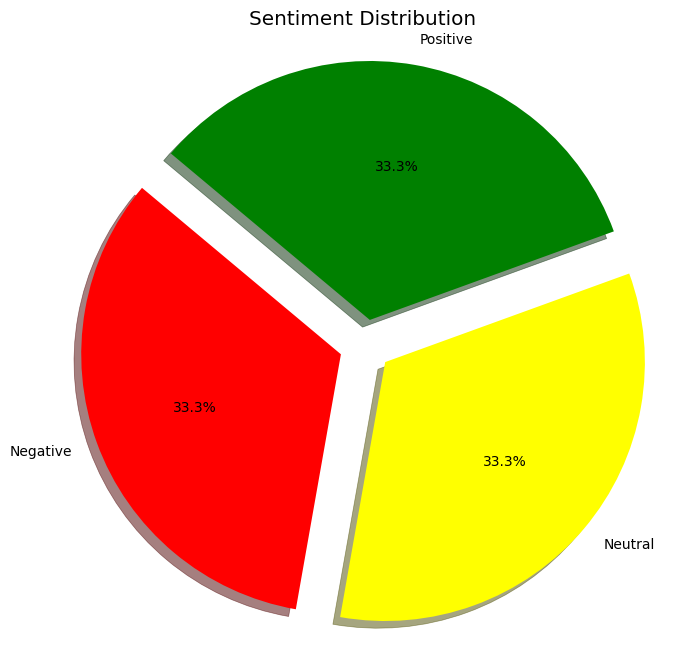

In [62]:

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140, colors=colors)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [63]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# NLTK stopwords
stop_words_nltk = set(stopwords.words('english'))


In [64]:
def text_cleaner(text):
    
    # BeautifulSoup-based HTML tag removal
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Regex-based cleaning
    text = text.lower()  # Convert to lower-case
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    text = re.sub(r'[‘’“”…]', '', text)  # Remove specific unwanted characters
    text = re.sub(r'\n', ' ', text)  # Replace newlines with space (to avoid word concatenation)
    
# NLTK-based tokenization
    tokens = word_tokenize(text)
    
    # Combine SpaCy and NLTK for processing
    filtered_tokens = []
    for token in nlp(' '.join(tokens)):  # Use SpaCy's parsing on tokens
        if token.lemma_ not in stop_words_nltk and not (token.is_stop or token.is_punct or token.is_digit or not token.is_alpha):
            filtered_tokens.append(token.lemma_)
    
    cleaned_text = ' '.join(filtered_tokens)

    return cleaned_text

In [65]:
text = "<p>This is a [test] sentence with {HTML} tags, punctuation, and numbers 123.</p>. \
This is an amazing text [to be cleaned], including numbers 237 and punctuation! Also, newlines\n and specific ‘characters"
cleaned_text = text_cleaner(text)
print(cleaned_text)


sentence html tag punctuation number amazing text include number punctuation newline specific character


In [66]:
df['Cleaned_text'] = [text_cleaner(x) for x in df['Text']]


## Texts Before_cleaning

In [78]:

Before_cleaning = [print(text + '\n\n') for text in df['Text'].values[:3]]


These were a great price that's why I gobbled some up [lemon, toffee, chocolate & strawberry].  I've tried the lemon in some of the WuLong tea [ick..guess I should try a better tasting tea?] noticed the after taste, as usual.  I've also tried the strawberry in some carbonated water [suggestion from the 101 Recipes for the HCG protocol] and that's not too bad.  Definitely something you gotta get use to...because of the after taste. [I know this product and other Stevia products are natural so this taste doesn't mentally affect me as does the Aspartame, Splenda and other man-made sweeteners - those are just plain bad for us but the after taste of these Stevita products remind me of those man-made sweeteners - ICK].  I've actually had a little better luck with the Nu-Stevia powder, as long as I am careful on the amount [for example I use it in my smoothies, i.e. 1 packet for a 16-20oz smoothie].  So the '3' rating is for the taste...and after-taste.  :-(


These don't taste like cardboard

## Texts After_cleaning

In [79]:

After_cleaning = [print(text + '\n\n') for text in
                  df['Cleaned_text'].values[:3]]


great price gobble try lemon wulong tea notice taste usual try strawberry carbonated water bad definitely get use tobecause taste actually little well luck nustevia powder long careful rating tasteand aftertaste


taste like cardboard thankfully pleasant subtle nutty flavor peanut butter texture center cookie moist hope outside slightly crunchy inside soft moist crumble easily alright purchase


initially sample lester fixin sweet corn soda buffalo wing soda bacon flavor concoction come conclusion creepy line beverage love novelty idea weirdo soda help mitigate poor rating itemsall say share bottle dubious beverage coworker thing notice open bottle smell well describe amalgamation bacos imitation bacon bit garbage seriousness somewhat fetid smell know drink probably taste fortunately smell beverage bad actually avoid scent soda marginally palatable essence taste like imitation bacon bit cane sugar faint linger aftertaste liquid smoke good lester fixin soda sample far problematic drink 

In [80]:
df.head()

Text  Score  \
Neutral 22457   These were a great price that's why I gobbled ...      3   
        469815  These don't taste like cardboard, thankfully; ...      3   
        201737  After having initially sampled the LESTER'S FI...      3   
        420251  As usual the biscuits is very good. Normally w...      3   
        339337  I'll start with a confession: I make my own ma...      3   

               Sentiment  Sentiment_num  \
Neutral 22457    Neutral              1   
        469815   Neutral              1   
        201737   Neutral              1   
        420251   Neutral              1   
        339337   Neutral              1   

                                                     Cleaned_text  
Neutral 22457   great price gobble try lemon wulong tea notice...  
        469815  taste like cardboard thankfully pleasant subtl...  
        201737  initially sample lester fixin sweet corn soda ...  
        420251  usual biscuit good normally couple biscuit tot...  
        339337  ill start confession margarita basic recipe li...

## Comprehensive Analysis of Word Frequencies Across Sentiment Categories Using NLP and Sentiment Analysis Techniques

## Top most used words


In [81]:
# Collecting all words from the 'Cleaned_text' 
Top_words = [word for text in df['Cleaned_text'] for word in text.split()]

# Display the first 100 words in 'Top_words'
print("First 100 words in Top_words:", Top_words[:100])

# Calculate the number of unique words in 'Top_words'
unique_word_count = len(set(Top_words))
print("Number of unique words in Top_words:", unique_word_count)


First 100 words in Top_words: ['great', 'price', 'gobble', 'try', 'lemon', 'wulong', 'tea', 'notice', 'taste', 'usual', 'try', 'strawberry', 'carbonated', 'water', 'bad', 'definitely', 'get', 'use', 'tobecause', 'taste', 'actually', 'little', 'well', 'luck', 'nustevia', 'powder', 'long', 'careful', 'rating', 'tasteand', 'aftertaste', 'taste', 'like', 'cardboard', 'thankfully', 'pleasant', 'subtle', 'nutty', 'flavor', 'peanut', 'butter', 'texture', 'center', 'cookie', 'moist', 'hope', 'outside', 'slightly', 'crunchy', 'inside', 'soft', 'moist', 'crumble', 'easily', 'alright', 'purchase', 'initially', 'sample', 'lester', 'fixin', 'sweet', 'corn', 'soda', 'buffalo', 'wing', 'soda', 'bacon', 'flavor', 'concoction', 'come', 'conclusion', 'creepy', 'line', 'beverage', 'love', 'novelty', 'idea', 'weirdo', 'soda', 'help', 'mitigate', 'poor', 'rating', 'itemsall', 'say', 'share', 'bottle', 'dubious', 'beverage', 'coworker', 'thing', 'notice', 'open', 'bottle', 'smell', 'well', 'describe', 'amal

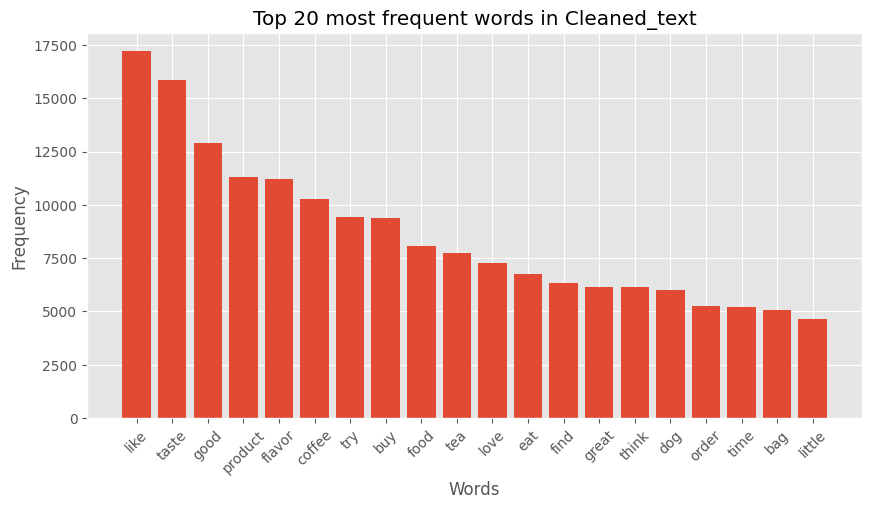

In [82]:
from collections import Counter
# Tokenization of words in 'Cleaned_text'
Top_words = [token.text for text in df['Cleaned_text'] for token in nlp(text)]

# Counting the frequencies of words
word_freq = Counter(Top_words)

# Selecting the top 20 words for visualization 
N = 20
most_common_words = word_freq.most_common(N)
words, counts = zip(*most_common_words)

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title(f'Top {N} most frequent words in Cleaned_text')
plt.show()


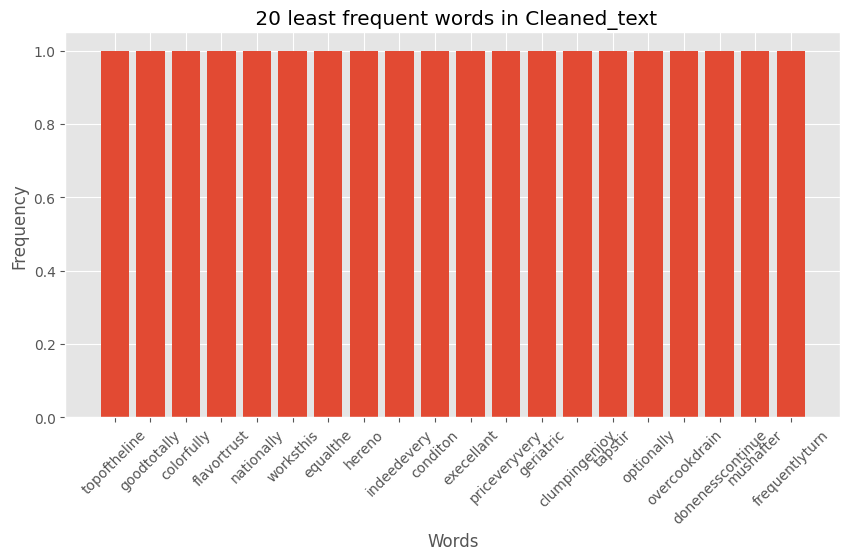

In [83]:
# Counting the frequencies of words
word_freq = Counter(Top_words)

# Selecting the bottom 20 words for visualization (change N to your desired number)
N = 20
least_common_words = word_freq.most_common()[:-N-1:-1]  # Getting the least common words
words, counts = zip(*least_common_words)

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title(f' {N} least frequent words in Cleaned_text')
plt.show()


In [84]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize VADER and spaCy
sia = SentimentIntensityAnalyzer()

# Analyzing sentiment and filtering positive texts
positive_texts = [text for text in df['Cleaned_text'] if sia.polarity_scores(text)['compound'] > 0.05]

# Tokenizing and filtering words
positive_words = [token.text.lower() for text in positive_texts for token in nlp(text) if token.is_alpha]

# Counting frequencies of words
word_freq = Counter(positive_words)

# Getting top 10 most common words
top_10_positive_words = word_freq.most_common(10)
print(top_10_positive_words)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[('like', 15927), ('taste', 13897), ('good', 12143), ('flavor', 10181), ('product', 9332), ('coffee', 9149), ('try', 8203), ('buy', 7748), ('love', 7066), ('food', 6990)]


#### Analyzing Word Frequencies in positive Sentiment Texts Using NLP Techniques

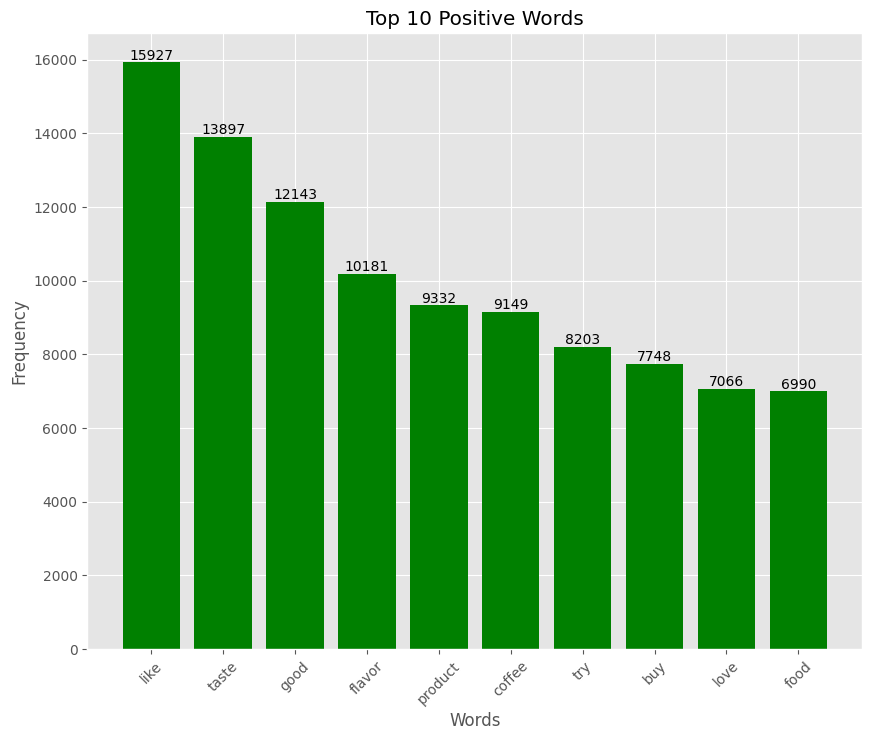

In [85]:
# Splitting the words and their counts into separate lists for plotting
words, frequencies = zip(*top_10_positive_words)

# Creating the plot for top 10 positive words
plt.figure(figsize=(10, 8))
bars = plt.bar(words, frequencies, color='green')  # Color changed to green to represent positive sentiment
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Positive Words')
plt.xticks(rotation=45)

# Adding the frequency labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.show()


#### Analyzing Word Frequencies in Neutral Sentiment Texts Using NLP Techniques

In [86]:
# Extracting neutral texts based on compound sentiment score
neutral_texts = [text for text in df['Cleaned_text'] if -0.05 <= sia.polarity_scores(text)['compound'] <= 0.05]

# Tokenizing and filtering words from neutral texts
neutral_words = [token.text.lower() for text in neutral_texts for token in nlp(text) if token.is_alpha]

# Counting frequencies of words in neutral texts
word_freq = Counter(neutral_words)

# Getting top 10 most common words in neutral texts
top_10_neutral_words = word_freq.most_common(10)


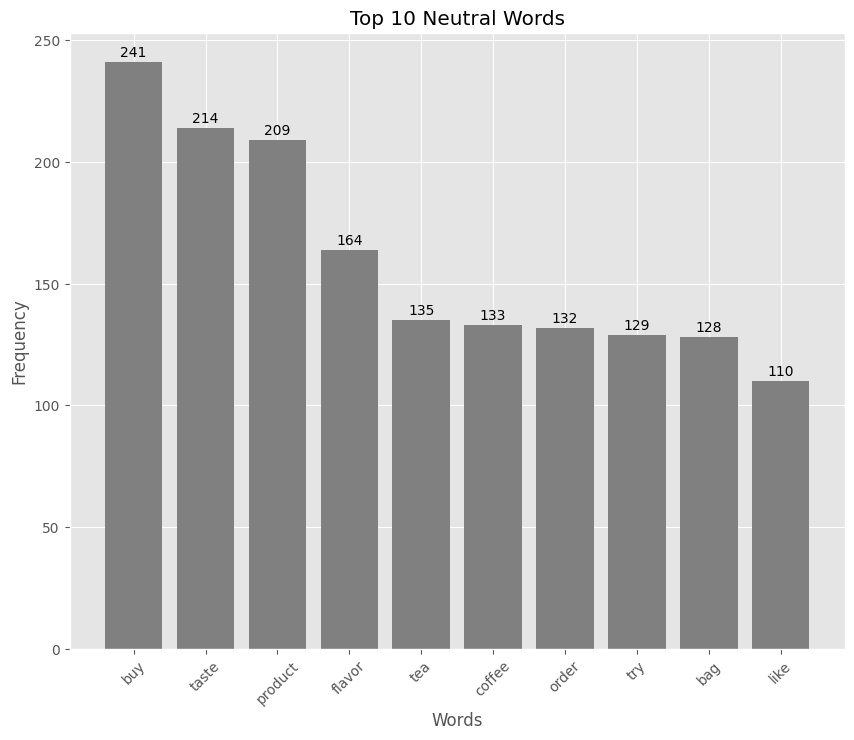

In [87]:
# Splitting the words and their counts into separate lists for plotting
words, frequencies = zip(*top_10_neutral_words)


# Creating the plot for top 10 neutral words
plt.figure(figsize=(10, 8))
bars = plt.bar(words, frequencies, color='grey')  # Color changed to grey to represent neutrality
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Neutral Words')
plt.xticks(rotation=45)

# Adding the frequency labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.show()


#### Analyzing Word Frequencies in Negative Sentiment Texts Using NLP Techniques

In [88]:
# Extracting negative texts based on compound sentiment score
negative_texts = [text for text in df['Cleaned_text'] if sia.polarity_scores(text)['compound'] < -0.05]

# Tokenizing and filtering words from negative texts
negative_words = [token.text.lower() for text in negative_texts for token in nlp(text) if token.is_alpha]

# Counting frequencies of words in negative texts
word_freq = Counter(negative_words)

# Getting top 10 most common words in negative texts
top_10_negative_words = word_freq.most_common(10)

# Splitting the words and their counts into separate lists for plotting
words, frequencies = zip(*top_10_negative_words)


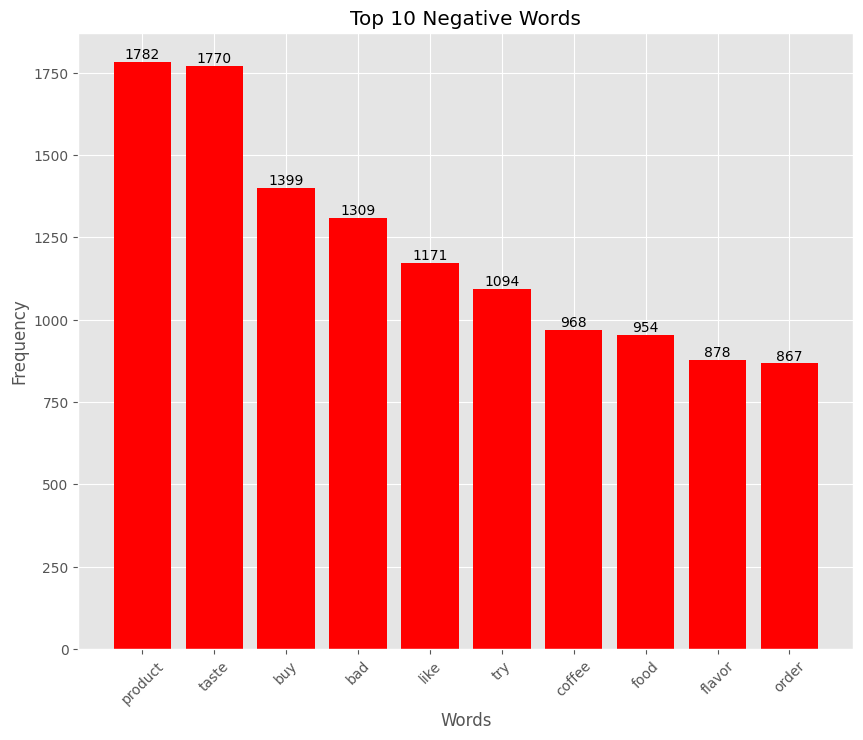

In [278]:
# Creating the plot for top 10 negative words
plt.figure(figsize=(10, 8))
bars = plt.bar(words, frequencies, color='red')  
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Negative Words')
plt.xticks(rotation=45)


# Adding the frequency labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.show()


## Words Embeddingd Using CBOW  and SG

In [73]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

sentences = ["This is a sentence", "This is another sentence","This can be another sentence"]

# Preprocess the text
tokenized_sentences = [simple_preprocess(sentence) for sentence in sentences]

# Train a Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Accessing the word vector for a specific word (corrected way)
word_vector_w2 = word2vec_model.wv['sentence']


In [74]:
word_vector_w2 #= word2vec_model.wv['sentence']

array([-8.6196875e-03,  3.6657380e-03,  5.1898835e-03,  5.7419385e-03,
        7.4669183e-03, -6.1676754e-03,  1.1056137e-03,  6.0472824e-03,
       -2.8400505e-03, -6.1735227e-03, -4.1022300e-04, -8.3689485e-03,
       -5.6000124e-03,  7.1045388e-03,  3.3525396e-03,  7.2256695e-03,
        6.8002474e-03,  7.5307419e-03, -3.7891543e-03, -5.6180597e-04,
        2.3483764e-03, -4.5190323e-03,  8.3887316e-03, -9.8581640e-03,
        6.7646410e-03,  2.9144168e-03, -4.9328315e-03,  4.3981876e-03,
       -1.7395747e-03,  6.7113843e-03,  9.9648498e-03, -4.3624435e-03,
       -5.9933780e-04, -5.6956373e-03,  3.8508223e-03,  2.7866268e-03,
        6.8910765e-03,  6.1010956e-03,  9.5384968e-03,  9.2734173e-03,
        7.8980681e-03, -6.9895042e-03, -9.1558648e-03, -3.5575271e-04,
       -3.0998408e-03,  7.8943167e-03,  5.9385742e-03, -1.5456629e-03,
        1.5109634e-03,  1.7900408e-03,  7.8175711e-03, -9.5101865e-03,
       -2.0553112e-04,  3.4691966e-03, -9.3897223e-04,  8.3817719e-03,
      

In [75]:
 word2vec_model.wv['another']

array([ 9.4563962e-05,  3.0773198e-03, -6.8126451e-03, -1.3754654e-03,
        7.6685809e-03,  7.3464094e-03, -3.6732971e-03,  2.6427018e-03,
       -8.3171297e-03,  6.2054861e-03, -4.6373224e-03, -3.1641065e-03,
        9.3113566e-03,  8.7338570e-04,  7.4907029e-03, -6.0740625e-03,
        5.1605068e-03,  9.9228229e-03, -8.4573915e-03, -5.1356913e-03,
       -7.0648370e-03, -4.8626517e-03, -3.7785638e-03, -8.5361991e-03,
        7.9556061e-03, -4.8439382e-03,  8.4236134e-03,  5.2625705e-03,
       -6.5500261e-03,  3.9578713e-03,  5.4701497e-03, -7.4265362e-03,
       -7.4057197e-03, -2.4752307e-03, -8.6257253e-03, -1.5815723e-03,
       -4.0343284e-04,  3.2996845e-03,  1.4418805e-03, -8.8142155e-04,
       -5.5940580e-03,  1.7303658e-03, -8.9737179e-04,  6.7936908e-03,
        3.9735902e-03,  4.5294715e-03,  1.4343059e-03, -2.6998555e-03,
       -4.3668128e-03, -1.0320747e-03,  1.4370275e-03, -2.6460087e-03,
       -7.0737829e-03, -7.8053069e-03, -9.1217868e-03, -5.9351693e-03,
      

## GloVe Embeddings

In [67]:
def load_glove_model(glove_file):
    embeddings = {}
    with open(glove_file, 'r', encoding='utf8') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = [float(val) for val in split_line[1:]]
            embeddings[word] = embedding
    return embeddings

In [68]:
# Load the GloVe model
glove_embeddings = load_glove_model('/kaggle/input/glove6b/glove.6B.300d.txt')

In [76]:
# Access the word vector for a specific word
word_vector = glove_embeddings['python']


In [77]:
word_vec = glove_embeddings.get("python", "Word not found")
#word_vec 

In [78]:
#  Finding the vector of a word
word_vec = glove_embeddings.get("python", "Word not found")

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Finding similarity between two words
similarity = cosine_similarity(glove_embeddings['python'], glove_embeddings['programming'])
print(f"Similarity between 'python' and 'programming': {similarity}")


Similarity between 'python' and 'programming': 0.2748269555723579


## FastText Embeddings with Gensim

In [79]:
from gensim.models import FastText

# Train a FastText model
fasttext_model = FastText(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Access the word vector for a specific word
word_vector_fast = fasttext_model.wv['sentence']


###  Comparing Word Embeddings: FastText vs. Word2Vec for some Words in the corpus 

In [80]:
fasttext_model.wv['sentence']  ,  word2vec_model.wv['sentence'] 

(array([-1.30061887e-03,  2.48397258e-03,  1.04415859e-03, -1.78420113e-03,
         2.58942903e-03, -1.03884947e-03,  1.11874728e-03,  1.15436269e-03,
         1.54379304e-04, -1.08192291e-03,  2.28913454e-03, -4.31879627e-04,
         1.34390313e-03, -2.35416926e-03, -2.70995906e-06, -4.10709676e-04,
         1.43901841e-03,  9.29185073e-04, -9.50136280e-04, -4.58112248e-04,
         6.05039648e-04,  1.13504590e-03,  4.94551263e-04,  1.71940948e-04,
         7.53537810e-04, -2.47401302e-03,  7.40220654e-04,  7.10947497e-04,
        -6.90750137e-04,  1.91862011e-04, -1.15981931e-03,  5.01476286e-04,
         1.84906268e-04, -3.16883484e-03, -7.62900803e-04, -2.95042206e-04,
         9.21084837e-04,  7.20396522e-04, -1.72101287e-03,  8.97153339e-04,
         1.80676416e-05, -2.22567120e-03,  1.61422568e-03,  1.89264258e-03,
        -1.37732574e-03,  6.09418377e-04, -2.63345428e-03, -1.01438898e-03,
         6.82578902e-05,  8.12245475e-04, -1.18997123e-03, -1.65776827e-03,
        -1.1

In [81]:
word_vector = glove_embeddings['sentence']

# Display the first 10 elements of the vector
first_ten_elements = word_vector[:10]

# Get the total length of the vector to determine its size
vector_length = len(word_vector)

# Print the results
print("First 10 elements of the vector:", first_ten_elements)
print("Total length of the vector:", vector_length)


First 10 elements of the vector: [-0.32636, -0.46357, -0.75916, -0.29272, 0.33039, -0.31612, 0.61998, -0.71929, -0.30143, -1.3178]
Total length of the vector: 300


In [82]:
fasttext_model.wv['another']  ,  word2vec_model.wv['another']

(array([ 1.2385456e-03,  2.0386144e-03, -7.1893755e-04,  6.9864833e-04,
         1.0323965e-03,  2.0065100e-04, -9.6268416e-04, -2.3882318e-04,
        -1.0528899e-03,  1.4481533e-03, -7.8536052e-04,  1.5107160e-03,
         1.7913854e-03, -5.8613822e-04, -1.1825848e-03, -1.1737371e-03,
         8.1723888e-04,  1.1798871e-03, -2.8229132e-03,  1.5076631e-03,
        -6.5219443e-04,  1.2562106e-03,  8.9084095e-04, -2.5000912e-03,
         6.2272639e-04, -1.6158549e-05,  8.3992702e-05,  1.2488095e-03,
        -1.3344390e-04, -8.5481437e-04, -2.1009578e-03, -1.6768408e-03,
         2.1431893e-04, -1.2853075e-03, -6.8651285e-04,  1.7670764e-03,
         5.8376609e-04,  6.9315400e-04,  6.9071440e-04, -2.6549617e-04,
        -8.1773801e-04, -5.4943189e-04, -1.2023583e-03,  3.0428488e-04,
        -4.6399186e-04, -7.6016824e-04, -2.4802142e-04, -9.7778696e-04,
         7.6112768e-04, -8.3478336e-04,  1.6090153e-03,  1.2975624e-04,
        -1.6002266e-03, -4.9992243e-04,  5.9361628e-04, -1.02563

In [83]:
sentences = ["This is a sentence", "This is another sentence"]

# Preprocess the text
tokenized_sentences = [simple_preprocess(sentence) for sentence in sentences]

# Train a Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Train a FastText model
fasttext_model = FastText(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)


### Handling In-Vocabulary and Out-Of-Vocabulary Words: A Comparison Between Word2Vec and FastText

In [84]:
# Accessing the word vector for an in-vocabulary word
in_vocab_word = "sentence"
word_vector_w2v = word2vec_model.wv[in_vocab_word]
word_vector_fasttext = fasttext_model.wv[in_vocab_word]

print(f"Word2Vec vector for '{in_vocab_word}':\n{word_vector_w2v[:5]}...")  # Displaying the first 5 elements for brevity
print(f"FastText vector for '{in_vocab_word}':\n{word_vector_fasttext[:5]}...")


Word2Vec vector for 'sentence':
[-0.00053623  0.00023643  0.00510335  0.00900927 -0.00930295]...
FastText vector for 'sentence':
[-0.00100123  0.00235696  0.00104095 -0.00166319  0.00196832]...


In [85]:
#  accessing the vector for an out-of-vocabulary word
oov_word = "sentences"
try:
    oov_vector_w2v = word2vec_model.wv[oov_word]
    print(f"Word2Vec vector for '{oov_word}':\n{oov_vector_w2v[:5]}...")
except KeyError:
    print(f"Word2Vec has no vector for '{oov_word}' (OOV).")

try:
    oov_vector_fasttext = fasttext_model.wv[oov_word]
    print(f"FastText vector for '{oov_word}':\n{oov_vector_fasttext[:5]}...")  # FastText can generate a vector for OOV words
except KeyError:
    print(f"FastText has no vector for '{oov_word}' (Unexpected).")


Word2Vec has no vector for 'sentences' (OOV).
FastText vector for 'sentences':
[-0.00173515  0.00136391  0.00065552 -0.0011062   0.00242377]...


### FastText's innovative approach of representing words as n-grams of characters, allowing it to approximate word representations by aggregating the embeddings of these n-grams.

In [86]:

token = nlp("Example")
token.vector.shape

(300,)

In [87]:
token = nlp("sample_text")
token.vector.shape

(300,)

In [88]:
doc = nlp("sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Oranges')")
doc.vector.shape

(300,)

In [89]:

df['vector'] = [nlp(text).vector for text in df['Cleaned_text']]


In [109]:
df.head()

Text  Score  \
Neutral 22457   These were a great price that's why I gobbled ...      3   
        469815  These don't taste like cardboard, thankfully; ...      3   
        201737  After having initially sampled the LESTER'S FI...      3   
        420251  As usual the biscuits is very good. Normally w...      3   
        339337  I'll start with a confession: I make my own ma...      3   

               Sentiment  Sentiment_num  \
Neutral 22457    Neutral              1   
        469815   Neutral              1   
        201737   Neutral              1   
        420251   Neutral              1   
        339337   Neutral              1   

                                                     Cleaned_text  \
Neutral 22457   great price gobble try lemon wulong tea notice...   
        469815  taste like cardboard thankfully pleasant subtl...   
        201737  initially sample lester fixin sweet corn soda ...   
        420251  usual biscuit good normally couple biscuit tot...   
        339337  ill start confession margarita basic recipe li...   

                                                           vector  
Neutral 22457   [0.4353079, 0.11091675, -1.9940904, 0.31744707...  
        469815  [0.372956, -0.006216402, -2.2229564, 1.1846427...  
        201737  [-0.10476533, -0.474346, -0.84346545, 0.199461...  
        420251  [-0.41057354, -0.8690024, -0.5110243, 0.734325...  
        339337  [-0.053727925, 0.59297085, -1.8156737, 1.09331...

In [110]:
from sklearn.model_selection import train_test_split

# Convert 'Vectors' column to a list
X = df['vector'].tolist()

# Get the labels from the 'Sentiment_num' column
y = df['Sentiment_num']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


In [111]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score


In [71]:
def train_and_evaluate_df(X_train, y_train, X_test, y_test):
    # ApplyING MinMaxScaler for MultinomialNB and StandardScaler for other models
    scaler_standard = StandardScaler()
    scaler_min_max = MinMaxScaler()

    X_train_scaled = scaler_standard.fit_transform(X_train)
    X_test_scaled = scaler_standard.transform(X_test)
    X_train_minmax = scaler_min_max.fit_transform(X_train)
    X_test_minmax = scaler_min_max.transform(X_test)

    models = {
        'Logistic Regression': (LogisticRegression(C=0.5, max_iter=1000), X_train_scaled, X_test_scaled),
        'SVM': (SVC(kernel='linear', C=0.1), X_train_scaled, X_test_scaled),
        'Naive Bayes': (MultinomialNB(), X_train_minmax, X_test_minmax),
        'Random Forest': (RandomForestClassifier(n_estimators=100, max_features='sqrt', min_samples_leaf=4), X_train_scaled, X_test_scaled),
        'Gradient Boosting': (GradientBoostingClassifier(n_estimators=100, min_samples_leaf=5), X_train_scaled, X_test_scaled),
        'XGBoost': (xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', subsample=0.8, colsample_bytree=0.8, max_depth=3, reg_lambda=1, alpha=0.5), X_train_scaled, X_test_scaled)
    }

    results = []
    for name, (model, X_tr, X_te) in models.items():
        model.fit(X_tr, y_train)
        train_acc = model.score(X_tr, y_train)
        test_acc = model.score(X_te, y_test)
        results.append({'Model': name, 'Training Accuracy': train_acc, 'Test Accuracy': test_acc})

    return pd.DataFrame(results)



In [72]:

df_accuracies = train_and_evaluate_df(X_train, y_train, X_test, y_test)
print(df_accuracies)


                 Model  Training Accuracy  Test Accuracy
0  Logistic Regression           0.636533       0.620667
1                  SVM           0.637644       0.620000
2          Naive Bayes           0.507467       0.511467
3        Random Forest           0.997911       0.625467
4    Gradient Boosting           0.662933       0.592800
5              XGBoost           0.714311       0.608533


In [314]:
from sklearn.model_selection import cross_val_score

def train_and_evaluate_df(X_train, y_train, X_test, y_test):

    models = {
        'Logistic Regression': LogisticRegression(C=0.05, max_iter=1000, penalty='l2'),
        'SVM': SVC(kernel='linear', C=0.05),
        'Naive Bayes': GaussianNB(),  # Changing the MultinomialNB to GaussianNB for handling any type of data
        'Random Forest': RandomForestClassifier(n_estimators=150, max_features='sqrt', min_samples_leaf=4),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, min_samples_leaf=5, subsample=0.8, max_features='sqrt'),
        'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, subsample=0.8, colsample_bytree=0.8, max_depth=3, reg_lambda=1, alpha=0.1)
    }

    results = []
    for name, model in models.items():
        try:
            model.fit(X_train_scaled, y_train)
            train_acc = model.score(X_train_scaled, y_train)
            test_acc = model.score(X_test_scaled, y_test)
            cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
            results.append({
                'Model': name,
                'Training Accuracy': train_acc,
                'Test Accuracy': test_acc,
                'CV Mean Accuracy': np.mean(cv_scores),
                'CV Std Deviation': np.std(cv_scores)
            })
        except Exception as e:
            results.append({
                'Model': name,
                'Error': str(e)
            })

    return pd.DataFrame(results)




In [87]:
df_accuracies = train_and_evaluate_df(X_train, y_train, X_test, y_test)
print(df_accuracies)

                 Model  Training Accuracy  Test Accuracy
0  Logistic Regression           0.636533       0.620667
1                  SVM           0.637644       0.620000
2          Naive Bayes           0.507467       0.511467
3        Random Forest           0.998356       0.631600
4    Gradient Boosting           0.662933       0.592800
5              XGBoost           0.714311       0.608533


## Hyperparameter  tunning

In [77]:
def train_and_evaluate_df(X_train, y_train, X_test, y_test):
    # Setting up the hyperparameter grids for each model using dictionaries
    param_grid = {
        'Logistic Regression': {'C': [0.01, 0.05, 0.1, 0.5, 1, 10], 'max_iter': [100, 500, 1000]},
        'SVM': {'C': [0.01, 0.05, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf']},
        'Random Forest': {'n_estimators': [100, 150, 200], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 4, 10]}
    }

    # Defining the models with placeholders for hyperparameters
    models = {
        'Logistic Regression': LogisticRegression(penalty='l2'),
        'SVM': SVC(),
        'Naive Bayes': GaussianNB(),  # No hyperparameters to tune here
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, min_samples_leaf=5, subsample=0.8, max_features='sqrt'),  # Not tuning this for now
        'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, subsample=0.8, colsample_bytree=0.8, max_depth=3, reg_lambda=1, alpha=0.1)  # Not tuning this for now
    }

    results = []
    for name, model in models.items():
        if name in param_grid:
            grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
            grid_search.fit(X_train_scaled, y_train)
            best_model = grid_search.best_estimator_
            cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
            train_acc = best_model.score(X_train_scaled, y_train)
            test_acc = best_model.score(X_test_scaled, y_test)
            results.append({
                'Model': name,
                'Best Parameters': grid_search.best_params_,
                'Training Accuracy': train_acc,
                'Test Accuracy': test_acc,
                'CV Mean Accuracy': np.mean(cv_scores),
                'CV Std Deviation': np.std(cv_scores)
            })
        else:
            model.fit(X_train_scaled, y_train)
            train_acc = model.score(X_train_scaled, y_train)
            test_acc = model.score(X_test_scaled, y_test)
            cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
            results.append({
                'Model': name,
                'Training Accuracy': train_acc,
                'Test Accuracy': test_acc,
                'CV Mean Accuracy': np.mean(cv_scores),
                'CV Std Deviation': np.std(cv_scores)
            })

    return pd.DataFrame(results)

In [78]:
df_accuracies = train_and_evaluate_df(X_train, y_train, X_test, y_test)
print(df_accuracies)


                 Model                                    Best Parameters  \
0  Logistic Regression                          {'C': 1, 'max_iter': 500}   
1                  SVM                          {'C': 1, 'kernel': 'rbf'}   
2          Naive Bayes                                                NaN   
3        Random Forest  {'max_features': 'sqrt', 'min_samples_leaf': 4...   
4    Gradient Boosting                                                NaN   
5              XGBoost                                                NaN   

   Training Accuracy  Test Accuracy  CV Mean Accuracy  CV Std Deviation  
0           0.636756       0.620933          0.618267          0.007966  
1           0.799733       0.646000          0.646044          0.005617  
2           0.490133       0.502667          0.487022          0.010768  
3           0.998978       0.635733          0.619289          0.004818  
4           0.639644       0.583200          0.585289          0.004592  
5           0.71

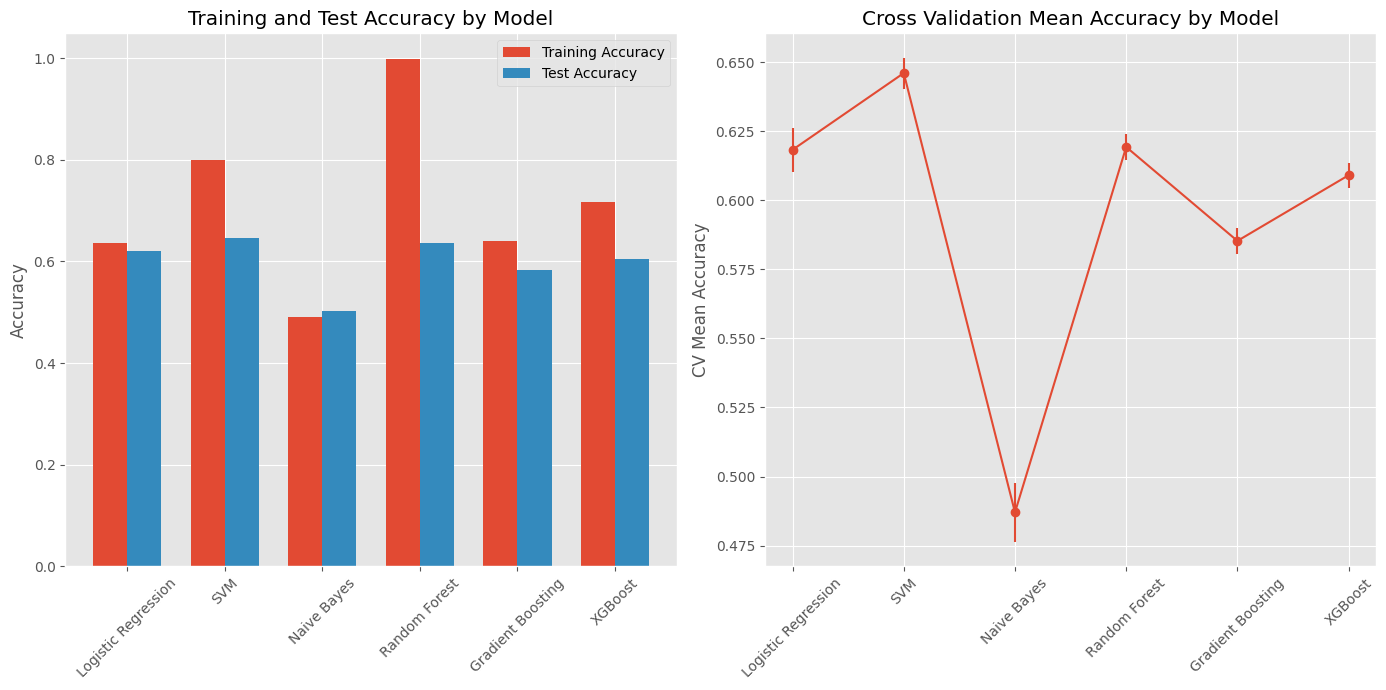

In [84]:
data = {
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'Training Accuracy': [0.636756, 0.799733, 0.490133, 0.998978, 0.639644, 0.716622],
    'Test Accuracy': [0.620933, 0.646000, 0.502667, 0.635733, 0.583200, 0.605467],
    'CV Mean Accuracy': [0.618267, 0.646044, 0.487022, 0.619289, 0.585289, 0.609067],
    'CV Std Deviation': [0.007966, 0.005617, 0.010768, 0.004818, 0.004592, 0.004553]
}

df_accuracies = pd.DataFrame(data)

# Setting up the matplotlib figure
plt.figure(figsize=(14, 7))

# Bar plot for Training and Test Accuracy
plt.subplot(1, 2, 1)
width = 0.35
x = df_accuracies['Model']
train_acc = df_accuracies['Training Accuracy']
test_acc = df_accuracies['Test Accuracy']

x_ind = range(len(x))  # the label locations
plt.bar(x_ind, train_acc, width, label='Training Accuracy')
plt.bar([p + width for p in x_ind], test_acc, width, label='Test Accuracy')

plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy by Model')
plt.xticks([p + width / 2 for p in x_ind], x, rotation=45)
plt.legend()

# Line plot for CV Mean Accuracy and Standard Deviation
plt.subplot(1, 2, 2)
plt.errorbar(x, df_accuracies['CV Mean Accuracy'], yerr=df_accuracies['CV Std Deviation'], fmt='-o')
plt.ylabel('CV Mean Accuracy')
plt.title('Cross Validation Mean Accuracy by Model')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


## 1. Prepare the Data fordeep learning

In [91]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
import pydot
import tensorflow.keras.backend as K


In [92]:
def define_model(n_words, n_classes):
    # define network
    model = Sequential()
    model.add(Dense(64, input_shape=(n_words,), activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(0.25))  # Dropout layer re-enabled
    model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(0.25))  # Dropout layer re-enabled
    model.add(Dense(n_classes, activation='softmax'))  # Adapted for multiclass classification
    
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model_multiclass.png', show_shapes=True)
    
    return model


In [93]:
def evaluate_model(Xtrain, ytrain, Xtest, ytest, n_classes):
    scores = list()
    n_repeats = 5
    n_words = Xtest.shape[1]
    
    for i in range(n_repeats):
        # Define the network with the number of classes
        model = define_model(n_words, n_classes)
        
        # Fit network
        model.fit(Xtrain, ytrain, epochs=10, verbose=0)
        
        # Evaluate the model on the test set
        _, acc = model.evaluate(Xtest, ytest, verbose=0)
        scores.append(acc)
        
        print(f'{i+1} accuracy: {acc:.4f}')
    return scores


In [94]:
from tensorflow.keras.preprocessing.text import Tokenizer

def create_tokenizer(lines, num_words=None):
    tokenizer = Tokenizer(num_words=num_words)  # if you like to limit the vocab to the top 'num_words'
    tokenizer.fit_on_texts(lines)
    return tokenizer


In [95]:
# create the tokenizer
train_docs = df['Cleaned_text']

tokenizer = create_tokenizer(train_docs)

In [96]:
# Encode the documents using binary mode
X = tokenizer.texts_to_matrix(train_docs, mode='binary')


In [97]:
X.shape

(30000, 48294)

In [61]:
X[0]

array([0., 0., 1., ..., 0., 0., 0.])

In [111]:
df.head()

Text  Score  \
Neutral 22457   These were a great price that's why I gobbled ...      3   
        469815  These don't taste like cardboard, thankfully; ...      3   
        201737  After having initially sampled the LESTER'S FI...      3   
        420251  As usual the biscuits is very good. Normally w...      3   
        339337  I'll start with a confession: I make my own ma...      3   

               Sentiment  Sentiment_num  \
Neutral 22457    Neutral              1   
        469815   Neutral              1   
        201737   Neutral              1   
        420251   Neutral              1   
        339337   Neutral              1   

                                                     Cleaned_text  \
Neutral 22457   great price gobble try lemon wulong tea notice...   
        469815  taste like cardboard thankfully pleasant subtl...   
        201737  initially sample lester fixin sweet corn soda ...   
        420251  usual biscuit good normally couple biscuit tot...   
        339337  ill start confession margarita basic recipe li...   

                                                           vector  
Neutral 22457   [0.4353079, 0.11091675, -1.9940904, 0.31744707...  
        469815  [0.372956, -0.006216402, -2.2229564, 1.1846427...  
        201737  [-0.10476533, -0.474346, -0.84346545, 0.199461...  
        420251  [-0.41057354, -0.8690024, -0.5110243, 0.734325...  
        339337  [-0.053727925, 0.59297085, -1.8156737, 1.09331...

In [98]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


In [99]:
labels = df['Sentiment_num']
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
y = to_categorical(integer_encoded, num_classes=3)


In [100]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_train.shape, X_test.shape


In [101]:
from tensorflow.keras.utils import plot_model

def define_model(n_words, n_classes=3): 
    K.clear_session()  # Clears any existing model in session
    # Define the network
    model = Sequential(name="sequential")
    model.add(Dense(64, input_shape=(n_words,), activation='relu', kernel_regularizer='l2', name='dense'))
    model.add(Dense(32, activation='relu', kernel_regularizer='l2', name='dense_1'))
    model.add(Dense(n_classes, activation='softmax', name='dense_2'))  #  for multiclass

    # Compile the network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Summarize defined model
    model.summary()
    plot_model(model, to_file='model_multiclass.png', show_shapes=True)
    
    return model


In [102]:
n_words = X_train.shape[1]  # Number of features in the input data

# Define the model for multiclass classification
n_classes = 3  
model = define_model(n_words, n_classes)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │     3,090,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,093,059 (11.80 MB)

 Trainable params: 3,093,059 (11.80 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
checkpoint = ModelCheckpoint("BestModel.keras",
                             monitor="val_loss", 
                             mode="min",
                             save_best_only=True,
                             verbose=1)
callbacks = [checkpoint]

# Fit the model
h = model.fit(X_train, y_train,  #  prepared for multiclass
              validation_split=0.1,  # Using 10% of the data for validation
              callbacks=callbacks,  # Saving the best model based on val_loss
              batch_size=180,  # Batch size can be adjusted based on dataset size
              epochs=25,  # Number of epochs can be adjusted based on convergence observations
              verbose=2)  # Verbose set to 2 for a more condensed output (one line per epoch)


In [1]:
# Create a figure with specified size
plt.figure(figsize=(8, 5))

# Plot the training and validation loss
plt.plot(list(range(1, 26)), h.history['loss'], label='Training Loss')
plt.plot(list(range(1, 26)), h.history['val_loss'], label='Validation Loss')

# Add a legend with a specified font size
plt.legend(fontsize=15)

# Add grid for better readability
plt.grid(True)

# Set the labels for the axes and a title for better understanding
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss Values', fontsize=15)
plt.title('Training and Validation Loss Per Epoch', fontsize=18)

# Show the plot
plt.show()


NameError: name 'plt' is not defined

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(8, 5))

# Plot the training and validation accuracy
plt.plot(list(range(1, 26)), h.history['accuracy'], label='Training Accuracy')
plt.plot(list(range(1, 26)), h.history['val_accuracy'], label='Validation Accuracy')

# Add a legend with specified font size
plt.legend(fontsize=15)

# Add grid for better readability
plt.grid(True)

# Set the labels for the axes and add a title for better understanding
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Training and Validation Accuracy Per Epoch', fontsize=18)

# Show the plot
plt.show()


In [ ]:
# Evaluate the model on the test set
loss, acc = model.evaluate(X_test, y_test, verbose=0)

# Print the test accuracy formatted as a percentage
print('Test Accuracy: {:.2f}%'.format(acc * 100))


In [115]:
def evaluate_model(X_train, y_train, X_test, y_test, n_repeats=5):
    scores = []
    n_words = X_train.shape[1]  #   X_train
    n_classes = y_train.shape[1]  # y_train is one-hot encoded and represents the number of classes
    
    for i in range(n_repeats):
        # Defining  the model for multiclass classification
        model = define_model(n_words, n_classes)
        
        # Fitting the model
        model.fit(X_train, y_train, epochs=10, verbose=0)
        
        # Evaluating the model on the test set
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        scores.append(accuracy)
        print(f'Iteration {i+1}: Test Accuracy = {accuracy * 100:.2f}%')
    
    return scores


## Developing a Multiclass Text Classification Model Using Keras' Embedding Layer

In [116]:
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras.layers import Conv1D, MaxPooling1D


In [117]:
df.head()

Text  Score  \
Neutral 22457   These were a great price that's why I gobbled ...      3   
        469815  These don't taste like cardboard, thankfully; ...      3   
        201737  After having initially sampled the LESTER'S FI...      3   
        420251  As usual the biscuits is very good. Normally w...      3   
        339337  I'll start with a confession: I make my own ma...      3   

               Sentiment  Sentiment_num  \
Neutral 22457    Neutral              1   
        469815   Neutral              1   
        201737   Neutral              1   
        420251   Neutral              1   
        339337   Neutral              1   

                                                     Cleaned_text  \
Neutral 22457   great price gobble try lemon wulong tea notice...   
        469815  taste like cardboard thankfully pleasant subtl...   
        201737  initially sample lester fixin sweet corn soda ...   
        420251  usual biscuit good normally couple biscuit tot...   
        339337  ill start confession margarita basic recipe li...   

                                                           vector  
Neutral 22457   [0.4353079, 0.11091675, -1.9940904, 0.31744707...  
        469815  [0.372956, -0.006216402, -2.2229564, 1.1846427...  
        201737  [-0.10476533, -0.474346, -0.84346545, 0.199461...  
        420251  [-0.41057354, -0.8690024, -0.5110243, 0.734325...  
        339337  [-0.053727925, 0.59297085, -1.8156737, 1.09331...

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    df['Cleaned_text'],  # Features
    df['Sentiment_num'], # Target variable
    test_size=0.2,       # 20% of the data will be used for testing
    random_state=42      # Seed for the random number generator for reproducibility
)

#  Xtrain, Xtest, ytrain, ytest 
print("Training set size:", len(Xtrain))
print("Testing set size:", len(Xtest))


In [119]:
from tensorflow.keras.preprocessing.text import Tokenizer

texts = df['Cleaned_text']
def create_tokenizer(texts):
    tokenizer = Tokenizer()  #  specify `num_words` if you want to limit vocabulary size
    tokenizer.fit_on_texts(df['Cleaned_text'])
    return tokenizer


In [120]:
def encode_docs(tokenizer, max_length, docs):
    encoded = tokenizer.texts_to_sequences(docs)
    padded = pad_sequences(encoded, maxlen=max_length, padding='post')
    return padded

In [121]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Cleaned_text'])



In [122]:
# Now you can safely access tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)

# Calculate the maximum sequence length
max_length = max(len(doc.split()) for doc in df['Cleaned_text'])
print('Maximum length: %d' % max_length)


Vocabulary size: 48294
Maximum length: 1732


In [123]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [124]:
tokenizer = create_tokenizer(Xtrain)
padded_docs_train = encode_docs(tokenizer, max_length, Xtrain)
padded_docs_train

array([[  213, 18580,   125, ...,     0,     0,     0],
       [    7,   171,   435, ...,     0,     0,     0],
       [   20,  2693,    90, ...,     0,     0,     0],
       ...,
       [  498,  1314,   333, ...,     0,     0,     0],
       [  313,   172,   194, ...,     0,     0,     0],
       [ 1563,   543,     3, ...,     0,     0,     0]], dtype=int32)

In [142]:
padded_docs_train.shape

(24000, 1732)

In [143]:
tokenizer = create_tokenizer(Xtest)
padded_docs_test = encode_docs(tokenizer, max_length, Xtest)
padded_docs_test

array([[   4,  143, 1643, ...,    0,    0,    0],
       [   8,   60, 1163, ...,    0,    0,    0],
       [ 847,  500,    3, ...,    0,    0,    0],
       ...,
       [  86, 6423,   55, ...,    0,    0,    0],
       [  22,   30,  100, ...,    0,    0,    0],
       [1665, 1597,  856, ...,    0,    0,    0]], dtype=int32)

In [144]:
padded_docs_test.shape

(6000, 1732)

In [145]:
from tensorflow.keras.utils import to_categorical


In [146]:
# Prepare target labels (one-hot encoding)
num_classes = ytrain.nunique()  # Determine the number of unique classes
ytrain_encoded = to_categorical(ytrain, num_classes=num_classes)
ytest_encoded = to_categorical(ytest, num_classes=num_classes)

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model

def CNN_model(vocab_size, max_length, num_classes):
    model = Sequential()
    model.add(Embedding(vocab_size, 300, input_length=max_length))

    # Convolutional layers for feature extraction
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=64, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # Flattening the output to feed into a Dense layer
    model.add(Flatten())
    
    # Dense layers for further processing of features
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))  # Adding dropout for regularization
    model.add(Dense(32, activation='relu'))

    # Output layer for multiclass classification
    # Number of neurons equals the number of classes
    # Softmax activation function for multiclass probability distribution
    model.add(Dense(num_classes, activation='softmax'))
    model.build(input_shape=(None, max_length))
    
    # Compile the model with categorical_crossentropy for multiclass classification
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Optional: summarize the model architecture
    model.summary()
    plot_model(model, to_file='model_multiclass.png', show_shapes=True)
    
    return model


In [107]:
from tensorflow.keras import backend as K


In [109]:
vocab_size = 48294  # This should be calculated from your tokenizer
max_length = 1732    # This should be the maximum length of your sequences
num_classes = 3

In [110]:
# define model
K.clear_session() 

model = CNN_model(vocab_size, max_length, num_classes)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 1732, 300)      │    14,488,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 1730, 64)       │        57,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 865, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 858, 64)        │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 429, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 27456)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,757,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,338,123 (62.32 MB)

 Trainable params: 16,338,123 (62.32 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 1732, 300)      │    14,488,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 1730, 64)       │        57,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 865, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 858, 64)        │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 429, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 27456)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,757,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,338,123 (62.32 MB)

 Trainable params: 16,338,123 (62.32 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
model.fit(
    padded_docs_train,
    ytrain_encoded,
    epochs=25,
    verbose=2,
    validation_data=(padded_docs_test, ytest_encoded)
)


Epoch 1/25
750/750 - 349s - 465ms/step - accuracy: 0.5178 - loss: 0.9457 - val_accuracy: 0.6143 - val_loss: 0.8207
Epoch 2/25
750/750 - 381s - 507ms/step - accuracy: 0.6704 - loss: 0.7291 - val_accuracy: 0.6277 - val_loss: 0.8064
Epoch 3/25
750/750 - 378s - 503ms/step - accuracy: 0.7759 - loss: 0.5853 - val_accuracy: 0.6307 - val_loss: 0.8432
Epoch 4/25
750/750 - 340s - 453ms/step - accuracy: 0.8637 - loss: 0.3607 - val_accuracy: 0.6280 - val_loss: 0.9620
Epoch 5/25
750/750 - 385s - 514ms/step - accuracy: 0.9194 - loss: 0.2300 - val_accuracy: 0.6245 - val_loss: 1.2147
Epoch 6/25
750/750 - 383s - 510ms/step - accuracy: 0.9543 - loss: 0.1429 - val_accuracy: 0.6467 - val_loss: 1.4097
Epoch 7/25
750/750 - 378s - 504ms/step - accuracy: 0.9670 - loss: 0.1051 - val_accuracy: 0.6353 - val_loss: 1.4687
Epoch 8/25
750/750 - 344s - 458ms/step - accuracy: 0.9746 - loss: 0.0790 - val_accuracy: 0.6242 - val_loss: 1.6472
Epoch 9/25
750/750 - 345s - 459ms/step - accuracy: 0.9820 - loss: 0.0627 - val_a

## XGBOOST

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


In [155]:
# Initialize a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_features = tfidf_vectorizer.fit_transform(df['Text'])

In [156]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_features, 
    df['Sentiment_num'], 
    test_size=0.25, 
    stratify=df['Sentiment_num'], 
    random_state=42
)

# Creating an XGBoost model object
# Note: For multiclass classification, you need to specify the 'objective' and 'num_class'
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=len(df['Sentiment_num'].unique()), eval_metric='mlogloss')

# Fit the model with X_train and y_train
xgb_classifier.fit(X_train, y_train)

# Get the predictions for X_test and store it in y_pred
y_pred = xgb_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.70      0.71      2500
           1       0.63      0.67      0.65      2500
           2       0.77      0.75      0.76      2500

    accuracy                           0.71      7500
   macro avg       0.71      0.71      0.71      7500
weighted avg       0.71      0.71      0.71      7500



In [158]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from xgboost import XGBClassifier


In [160]:
# Configuration for cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Setting up the XGBoost Classifier
xgb_classifier= XGBClassifier(
    objective='multi:softmax',  # Using softmax for multiclass classification
    num_class=len(df['Sentiment_num'].unique()),  # Setting the number of classes
    eval_metric='mlogloss',  # Evaluation metric for multiclass classification
    use_label_encoder=False,  # To avoid a warning about deprecated label encoding
    learning_rate=0.1,  # Learning rate
    n_estimators=100,  # Number of trees
    max_depth=6,  # Depth of each tree
    subsample=0.8,  # Percentage of samples used per tree
    colsample_bytree=0.8,  # Percentage of features used per tree
    random_state=42  # Ensuring consistency across runs
)

# Perform cross-validation
results = cross_validate(
    xgb_classifier, 
    tfidf_features, 
    df['Sentiment_num'], 
    cv=kfold, 
    scoring='accuracy', 
    return_train_score=True,
    verbose=1  # Optional: to see logs during the training
)

# Output the results
train_mean = np.round((results['train_score'].mean()) * 100, 2)
train_std = np.round((results['train_score'].std()) * 100, 2)
test_mean = np.round((results['test_score'].mean()) * 100, 2)
test_std = np.round((results['test_score'].std()) * 100, 2)

print(f"Training Accuracy: {train_mean}% ± {train_std}%")
print(f"Testing Accuracy: {test_mean}% ± {test_std}%")


Training Accuracy: 79.24% ± 0.09%
Testing Accuracy: 67.91% ± 0.7%


In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

## Deployment

In [68]:
def text_cleaner(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'[‘’“”…]', '', text)
    text = re.sub(r'\n', ' ', text)
    tokens = word_tokenize(text)
    filtered_tokens = []
    for token in nlp(' '.join(tokens)):
        if token.lemma_ not in stop_words_nltk and not (token.is_stop or token.is_punct or token.is_digit or not token.is_alpha):
            filtered_tokens.append(token.lemma_)
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text

# Adapting the function for use with multiple documents
def clean_texts(texts):
    return [text_cleaner(text) for text in texts]


In [69]:
from sklearn.preprocessing import FunctionTransformer
# Wrap the cleaning function for use in a pipeline
cleaner_transformer = FunctionTransformer(clean_texts, validate=False)


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['Sentiment_num'], test_size=0.25, stratify=df['Sentiment_num'], random_state=42)


In [ ]:
# Define the XGBoost classifier
xgb_classifier = XGBClassifier(
    objective='multi:softmax',
    num_class=len(df['Sentiment_num'].unique()),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
# Create the pipeline
pipeline = Pipeline([
    ('cleaner', cleaner_transformer),
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', xgb_classifier)
])


In [72]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict using the pipeline
y_pred = pipeline.predict(X_test)

# Print the classification report to evaluate the results
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.70      0.69      2500
           1       0.60      0.56      0.58      2500
           2       0.71      0.73      0.72      2500

    accuracy                           0.67      7500
   macro avg       0.66      0.67      0.66      7500
weighted avg       0.66      0.67      0.66      7500



In [73]:
import joblib
# Save the pipeline to a file
joblib.dump(pipeline, 'sentiment_model_pipeline.joblib')


['sentiment_model_pipeline.joblib']

#  Testing the sentiment analysis pipeline

In [74]:
test_texts = [
    "I really love the new design of your product!",
    "Honestly, it could have been better. I had higher expectations.",
    "Worst experience ever with this product. Not recommended!",
    "This is a wonderful experience, I'm very satisfied.",
    "I'm indifferent about this. It works okay, nothing special."
]

# Using the pipeline to predict the sentiment of each text
predicted_sentiments = pipeline.predict(test_texts)

# Mapping numeric predictions back to sentiment labels
sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
predicted_labels = [sentiment_labels.get(pred, 'Error') for pred in predicted_sentiments]

# Print the results
for text, sentiment in zip(test_texts, predicted_labels):
    print(f"Text: {text}\nPredicted Sentiment: {sentiment}\n")


Text: I really love the new design of your product!
Predicted Sentiment: Positive

Text: Honestly, it could have been better. I had higher expectations.
Predicted Sentiment: Neutral

Text: Worst experience ever with this product. Not recommended!
Predicted Sentiment: Negative

Text: This is a wonderful experience, I'm very satisfied.
Predicted Sentiment: Positive

Text: I'm indifferent about this. It works okay, nothing special.
Predicted Sentiment: Neutral



In [168]:
from flask import Flask, request, render_template
import joblib

app = Flask(__name__)

# Load the trained pipeline
try:
    model_pipeline = joblib.load('sentiment_model_pipeline.joblib')
except Exception as e:
    print("Failed to load model:", e)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        message = request.form['message']
        try:
            prediction = model_pipeline.predict([message])[0]
            sentiment = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}.get(prediction, 'Error')
        except Exception as e:
            sentiment = f"Error processing prediction: {str(e)}"
        return render_template('result.html', prediction=sentiment)

if __name__ == '__main__':
    app.run(debug=True, port=5001)

